In [2]:
# Set up notebook

import pandas as pd
import os
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import (ttest_1samp, ttest_rel, ttest_ind)

# base_dir = r'C:\Users\Young\Desktop\Personal\Python_Toolkit\xbrl data'  

# Import pickle file
df = pd.read_pickle('df_cleaned.p')

In [18]:
df.head()

,tag,ddate,rd_expense,assets,net_income,debt,cik,name,sic,form,...,roa,year,log_assets,leverage,roa_next_year,roa_last_year,roa_diff_next_year,rd_intensity_last_year,rd_intensity_diff,sic_2digit
13,ResearchAndDevelopmentExpense,2023-12-31,4.356600e+07,5.378000e+06,-51847000.0,0.0,1651407.0,"CHECKPOINT THERAPEUTICS, INC.",2834,10-K,...,-9.640573,2023,15.497827,0.000000,-7.527774,-9.640573,2.112799,3.725301,0.0,28
15,ResearchAndDevelopmentExpense,2024-12-31,2.549500e+07,1.594760e+08,-72206000.0,0.0,1555279.0,908 DEVICES INC.,3829,10-K,...,-0.452770,2024,18.887404,0.000000,-0.179322,-0.452770,0.273448,0.159867,0.0,38
17,ResearchAndDevelopmentExpense,2023-12-31,1.564960e+08,5.953440e+08,-180664000.0,30698000.0,1761612.0,BICYCLE THERAPEUTICS PLC,2834,10-K,...,-0.303462,2023,20.204650,0.051563,-0.176650,-0.303462,0.126811,0.262867,0.0,28
22,ResearchAndDevelopmentExpense,2023-12-31,2.720819e+09,3.303131e+10,9772000.0,0.0,1512673.0,"BLOCK, INC.",7372,10-K,...,0.000296,2023,24.220722,0.000000,0.078772,-0.000640,0.078476,0.082371,0.0,73
34,ResearchAndDevelopmentExpense,2024-12-31,1.654200e+07,5.342500e+07,-38492000.0,0.0,1585608.0,"JAGUAR HEALTH, INC.",2834,10-K,...,-0.720487,2024,17.793789,0.000000,-0.825424,-0.734693,-0.104937,0.309630,0.0,28


In [3]:
# Quick check
# df.dtypes

df['rd_intensity']
# df[['rd_intensity', 'roa']].describe()

13      3.604969
15      0.159867
17      0.262867
22      0.082371
34      0.309630
          ...   
5849    0.104095
5854    0.659663
5856    0.344063
5859    0.460631
5865    0.293131
Name: rd_intensity, Length: 1504, dtype: float64

Descriptive Question 1: Which industries allocate the largest share of assets to R&D relative to their size?

In [4]:

# Create list for unique 2 digit SIC Code
sic_2digit_list = df['sic_2digit'].dropna().unique()
sic_2digit_list.sort()

result_q1 = []

# Loop through each SIC code to calculate mean, median
for s in sic_2digit_list:

    # Filter df for SIC 2 digit code (current), and select rd_intensity
    temporary = df.loc[df['sic_2digit'] == s, 'rd_intensity'].dropna()

    result_q1.append( { 'sic_2digit': s , 'mean': temporary.mean(), 'median': temporary.median(), 'count' : len(temporary)})

result_q1 

[{'sic_2digit': '01',
  'mean': np.float64(0.017983357883191275),
  'median': np.float64(0.017171911260919003),
  'count': 4},
 {'sic_2digit': '07',
  'mean': np.float64(0.03222474048383057),
  'median': np.float64(0.03222474048383057),
  'count': 6},
 {'sic_2digit': '10',
  'mean': np.float64(0.007645213706894816),
  'median': np.float64(0.0036032140669477173),
  'count': 5},
 {'sic_2digit': '13',
  'mean': np.float64(0.008365357033035122),
  'median': np.float64(0.007293705003862186),
  'count': 10},
 {'sic_2digit': '21',
  'mean': np.float64(0.07420599690488332),
  'median': np.float64(0.07420599690488332),
  'count': 2},
 {'sic_2digit': '25',
  'mean': np.float64(0.03628224254673618),
  'median': np.float64(0.03628224254673618),
  'count': 2},
 {'sic_2digit': '27',
  'mean': np.float64(0.08581738977349755),
  'median': np.float64(0.08581738977349755),
  'count': 2},
 {'sic_2digit': '28',
  'mean': np.float64(0.5295235034465869),
  'median': np.float64(0.3175779801296441),
  'count'

In [5]:
# Turn dictionary into dataframe to plot
q1_df = pd.DataFrame(result_q1)

# Set minimum number of observation needed to identify and filter top/bottom 3
min_observation = 10

#Filter out industries with less than 10 observations 
q1_df = q1_df[q1_df['count'] >= min_observation].copy()

# Sort by median rd_intensity to rank industries

q1_df = q1_df.sort_values(by = 'median', ascending = False)

# Identify top 3 and bottom 3
top_3_sic = q1_df.head(3)
top_3_sic['Group'] = 'Top 3 R&D Intensity'

# Bottom 3
bottom_3_sic = q1_df.tail(3)
bottom_3_sic['Group'] = 'Bottom 3 R&D Intensity'

# Combine results
top_bottom_3_table = pd.concat([top_3_sic, bottom_3_sic])
top_bottom_3_table.columns = ['2 Digit SIC', 'Mean R&D Intensity', 'Median R&D Intensity', 'Observation Count', 'Group']

top_bottom_3_table

C:\Users\Young\AppData\Local\Temp\ipykernel_27280\1827757127.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_sic['Group'] = 'Top 3 R&D Intensity'
C:\Users\Young\AppData\Local\Temp\ipykernel_27280\1827757127.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_3_sic['Group'] = 'Bottom 3 R&D Intensity'


,2 Digit SIC,Mean R&D Intensity,Median R&D Intensity,Observation Count,Group
7,28,0.529524,0.317578,720,Top 3 R&D Intensity
26,73,0.167801,0.124799,214,Top 3 R&D Intensity
29,80,0.713690,0.100791,21,Top 3 R&D Intensity
11,34,0.104519,0.022520,11,Bottom 3 R&D Intensity
10,33,0.019507,0.021615,15,Bottom 3 R&D Intensity
3,13,0.008365,0.007294,10,Bottom 3 R&D Intensity


Text(0.5, 1.0, 'R&D Intensity Distribution for Top 5 Industries')

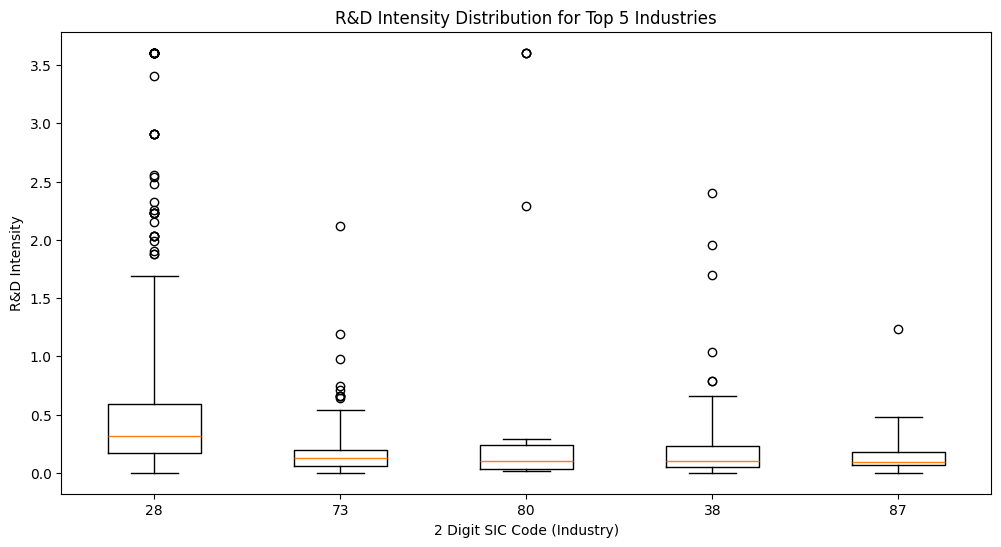

In [6]:
# Q1 Visualization -- Box Plot

# Select top 5 industries (R&D Intensity) for plotting 
top5_sic_code = q1_df.head(5)
top5_sic_code = top5_sic_code['sic_2digit'].tolist()

q1_data_plot = []

# Extract R&D intensity data for top 5 SIC and put them into arrays for boxplotting purposes
for sic in top5_sic_code:
    q1_data_plot.append(df[df['sic_2digit'] == sic] ['rd_intensity'].dropna() )


fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.boxplot(q1_data_plot, tick_labels= top5_sic_code, whis = 3)

ax.set_xlabel('2 Digit SIC Code (Industry)')
ax.set_ylabel('R&D Intensity')
ax.set_title('R&D Intensity Distribution for Top 5 Industries')

Descriptive Question 2: How has R&D intensity changed over time, and does this trend differ across industries?

In [16]:
# Select top 3 industries (R&D Intensity) for plotting 
top3_sic_code = q1_df.head(3)
top3_sic_code = top3_sic_code['sic_2digit'].tolist()

# Realized that 2025 data is incomplete, so filter only up to 2024
df_filtered = df[df['year'].isin([2023, 2024])].copy()
top3_sic_code
# Calculate Overall R&D Intensity trend 
overall_rd_trend = df_filtered.groupby('year')['rd_intensity'].mean().reset_index()
overall_rd_trend['sic_2digit'] = 'Overall Average'

# Calculate R&D Intensity trend for top 3 industries
top3_df = df_filtered[df_filtered['sic_2digit'].isin(top3_sic_code)].copy()
top3_rd_trend = top3_df.groupby(['year', 'sic_2digit'])['rd_intensity'].mean().reset_index()

# Combine overall and top 3 R&D Intensity trend for viszulization
rd_trend_data = pd.concat([overall_rd_trend, top3_rd_trend ])

rd_trend_data

,year,rd_intensity,sic_2digit
0,2023,0.364137,Overall Average
1,2024,0.316778,Overall Average
0,2023,0.553622,28
1,2023,0.183479,73
2,2023,0.873045,80
3,2024,0.501203,28
4,2024,0.152544,73
5,2024,0.501216,80


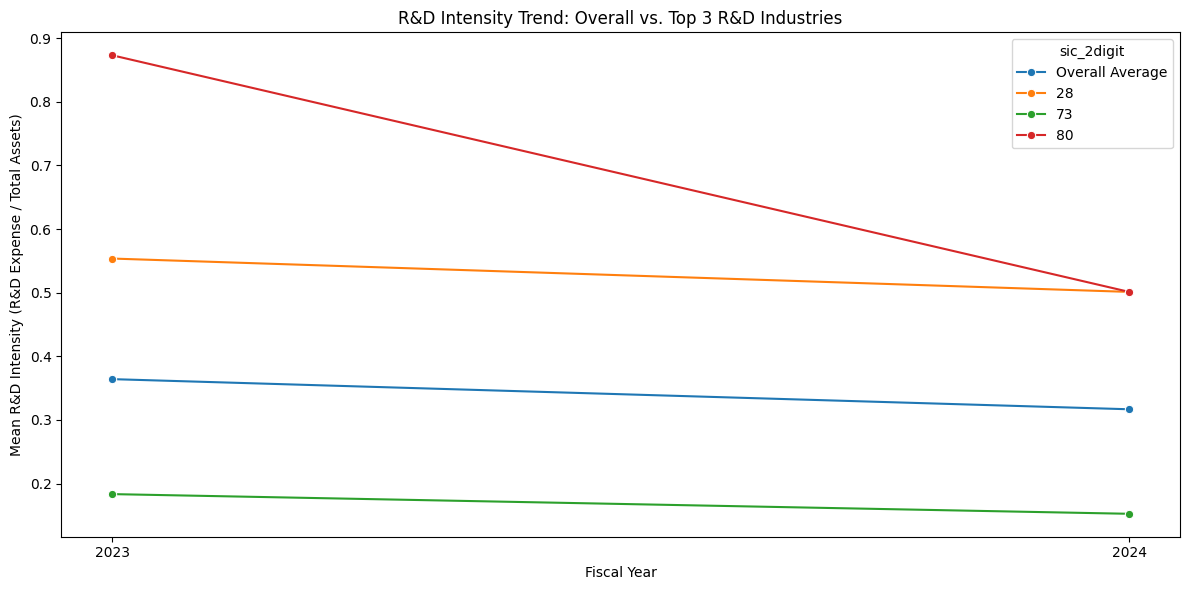

In [17]:
plt.figure(figsize=(12,6) )

sns.lineplot(data=rd_trend_data, x='year', y='rd_intensity', hue='sic_2digit', marker='o')

# Add labels and title
plt.xlabel('Fiscal Year')
plt.ylabel('Mean R&D Intensity (R&D Expense / Total Assets)')
plt.title('R&D Intensity Trend: Overall vs. Top 3 R&D Industries')
# Set x-ticks to ensure only the actual years (2023, 2024, 2025) are labeled
plt.xticks(rd_trend_data['year'].unique()) 
plt.tight_layout()

Descriptive Question 3: How does next-year ROA differ across firms with low, medium, and high R&D intensity?

In [28]:
# Prepare data for Q3 analysis (ROA vs. R&D Intensity)
q3_df = df.dropna(subset=['rd_intensity', 'roa']).copy()


# Define 33rd and 67th percentiles 
pct_33th = q3_df['rd_intensity'].quantile(0.33)
pct_67th = q3_df['rd_intensity'].quantile(0.67)

# Create function to categorize R&D Intensity groups
def rd_intensity_group(rd_intensity):
    if rd_intensity < pct_33th:
        return 'Low R&D Intensity (<= 33rd Percentile)'
    elif rd_intensity > pct_67th:
        return 'High R&D Intensity (> 67th Percentile)'
    else:
        return 'Medium R&D Intensity (34th - 67th Percentile)'
    
# Apply the categorization function to create the 'rd_intensity_group' column
# each row one at a time will run through the function above
q3_df['rd_intensity_group'] = q3_df['rd_intensity'].apply(rd_intensity_group)

# Check values 
print(f"33rd Percentile (Low/Medium threshold): {pct_33th:.4f}")
print(f"67th Percentile (Medium/High threshold): {pct_67th:.4f}")

# Calculate median next year ROA for each R&D Intensity group
median_roa_by_rd = q3_df.groupby('rd_intensity_group')['roa_next_year'].median().reset_index()



print(median_roa_by_rd)


33rd Percentile (Low/Medium threshold): 0.0753
67th Percentile (Medium/High threshold): 0.2876
                              rd_intensity_group  roa_next_year
0         High R&D Intensity (> 67th Percentile)      -0.821814
1         Low R&D Intensity (<= 33rd Percentile)       0.006447
2  Medium R&D Intensity (34th - 67th Percentile)      -0.244295


C:\Users\Young\AppData\Local\Temp\ipykernel_27280\455630030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_roa_by_rd, x='rd_intensity_group', y='roa_next_year', palette='viridis')


Text(0.5, 1.0, 'Median Next-Year ROA by Current R&D Intensity Group')

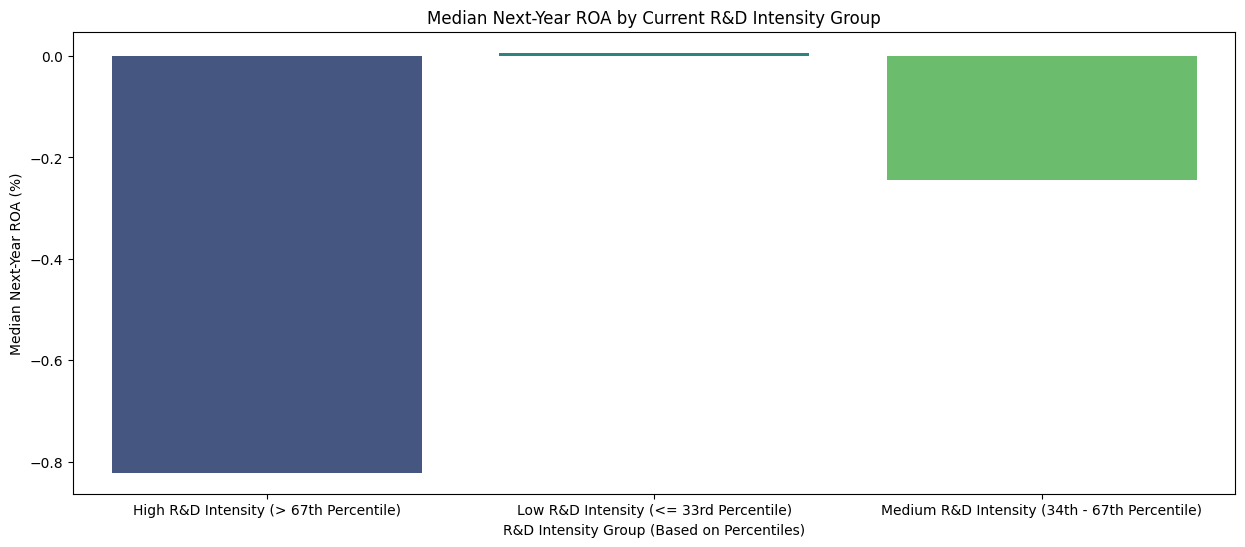

In [30]:
# Q3 visualization (Bar Chart)
plt.figure(figsize=(15,6))
sns.barplot(data=median_roa_by_rd, x='rd_intensity_group', y='roa_next_year', palette='viridis')

plt.xlabel('R&D Intensity Group (Based on Percentiles)')
plt.ylabel('Median Next-Year ROA (%)')
plt.title('Median Next-Year ROA by Current R&D Intensity Group')
